In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [9]:
#Reading Gene Dependency, Effect and Expression Data
gene_dep = pd.read_csv('CRISPR_gene_dependency.csv', index_col='DepMap_ID').T
gene_eff = pd.read_csv('CRISPR_gene_effect.csv', index_col='DepMap_ID').T
CCLE_express = pd.read_csv('CCLE_expression.csv', index_col=0).T

In [ ]:
print(gene_dep.shape)
print(gene_eff.shape)
print(CCLE_express.shape)

In [3]:
data0 = gene_dep.merge(gene_eff, how='inner', left_index=True, right_index=True)
data = data0.merge(CCLE_express, how='inner', left_index=True, right_index=True)

In [6]:
regex = "(\S+) \([0-9]+\)"

def func(x):
    pattern = re.findall(regex, x)
    if len(pattern) > 0:
        return pattern[0]
    else:
        print(x)
        return x

data.index = data.index.to_series().apply(func)

In [8]:
display(data)

,ACH-000001_x,ACH-000004_x,ACH-000005_x,ACH-000007_x,ACH-000009_x,ACH-000011_x,ACH-000012_x,ACH-000013_x,ACH-000014_x,ACH-000015_x,...,ACH-001578,ACH-000036,ACH-000973,ACH-001128,ACH-000750,ACH-000285,ACH-002669,ACH-001858,ACH-001997,ACH-000052
A1BG,0.094568,0.012676,0.053957,0.026704,0.059383,0.009210,0.132594,0.062889,0.035633,0.158699,...,2.134221,2.560715,4.986411,4.303781,0.000000,4.868390,0.014355,0.176323,0.000000,4.867402
A1CF,0.012519,0.049011,0.027968,0.083588,0.051826,0.026635,0.023306,0.083143,0.066640,0.022402,...,0.000000,0.097611,0.000000,0.000000,0.028569,0.014355,1.035624,0.056584,0.000000,0.000000
A2M,0.027460,0.075933,0.010139,0.008853,0.015370,0.014967,0.004661,0.022577,0.014464,0.044024,...,1.238787,0.189034,0.014355,0.000000,0.201634,0.163499,0.000000,0.097611,0.000000,1.992768
A2ML1,0.025962,0.033215,0.005448,0.011299,0.011721,0.003488,0.002901,0.009602,0.015126,0.017902,...,2.805292,0.000000,0.014355,0.000000,0.014355,0.042644,0.000000,0.014355,0.250962,3.187451
A3GALT2,0.073412,0.013176,0.018599,0.027288,0.030062,0.047524,0.011829,0.091157,0.037230,0.023196,...,0.000000,0.042644,0.000000,0.000000,0.028569,0.000000,0.000000,0.000000,0.000000,0.084064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,0.082956,0.060266,0.034712,0.035241,0.189550,0.009149,0.049289,0.057496,0.052079,0.019212,...,3.495695,0.014355,1.646163,2.715893,0.014355,2.301588,0.000000,0.815575,0.070389,0.084064
ZYG11B,0.012000,0.128375,0.092832,0.138445,0.328064,0.056635,0.045852,0.056781,0.025882,0.035994,...,3.040892,2.548437,3.080658,3.058316,1.887525,3.212569,2.432959,2.976364,2.134221,3.097611
ZYX,0.003592,0.005911,0.012482,0.103161,0.035161,0.062535,0.077850,0.035514,0.243090,0.059653,...,4.972233,7.303141,6.967630,6.705563,6.788425,1.867896,5.660495,7.199967,6.141392,5.522621
ZZEF1,0.012679,0.004645,0.020843,0.146222,0.058402,0.058550,0.048095,0.128022,0.003396,0.101086,...,3.764474,3.582556,3.818646,3.815575,3.432959,3.902074,2.754888,3.465974,3.407353,3.606442


In [10]:
labels = pd.read_csv('labels.csv', index_col='gene').iloc[:, 1]
labels.rename_axis("DepMap_ID")
labels = labels == 'positive'
display(labels)

gene
TOP2A         True
POLA1         True
MDM4          True
TUBB8         True
TUBB2B        True
             ...  
TRPS1        False
LINC01588    False
GNAO1        False
FAM222A      False
C19orf25     False
Name: label, Length: 7327, dtype: bool

In [12]:
MergedData = data.merge(labels, how='inner', left_index=True, right_index=True)
display(MergedData)

,ACH-000001_x,ACH-000004_x,ACH-000005_x,ACH-000007_x,ACH-000009_x,ACH-000011_x,ACH-000012_x,ACH-000013_x,ACH-000014_x,ACH-000015_x,...,ACH-000036,ACH-000973,ACH-001128,ACH-000750,ACH-000285,ACH-002669,ACH-001858,ACH-001997,ACH-000052,label
A1BG,0.094568,0.012676,0.053957,0.026704,0.059383,0.009210,0.132594,0.062889,0.035633,0.158699,...,2.560715,4.986411,4.303781,0.000000,4.868390,0.014355,0.176323,0.000000,4.867402,False
A1BG,0.094568,0.012676,0.053957,0.026704,0.059383,0.009210,0.132594,0.062889,0.035633,0.158699,...,2.560715,4.986411,4.303781,0.000000,4.868390,0.014355,0.176323,0.000000,4.867402,False
A1CF,0.012519,0.049011,0.027968,0.083588,0.051826,0.026635,0.023306,0.083143,0.066640,0.022402,...,0.097611,0.000000,0.000000,0.028569,0.014355,1.035624,0.056584,0.000000,0.000000,False
A2ML1,0.025962,0.033215,0.005448,0.011299,0.011721,0.003488,0.002901,0.009602,0.015126,0.017902,...,0.000000,0.014355,0.000000,0.014355,0.042644,0.000000,0.014355,0.250962,3.187451,False
A4GNT,0.020199,0.005015,0.005457,0.032573,0.042128,0.031224,0.004329,0.047029,0.351851,0.007575,...,0.014355,0.097611,0.000000,0.028569,0.014355,0.028569,0.056584,0.014355,0.189034,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZW10,0.555867,0.007427,0.071035,0.213754,0.169463,0.163544,0.128432,0.947852,0.130615,0.174493,...,2.247928,5.005400,4.213347,4.361768,4.418190,3.349082,4.179511,3.889474,4.536675,False
ZWINT,0.080585,0.230569,0.274568,0.615338,0.405712,0.535260,0.966785,0.010011,0.937716,0.120301,...,5.747656,7.031991,6.802710,6.051155,7.784504,7.004951,5.780835,5.515069,7.090007,False
ZWINT,0.080585,0.230569,0.274568,0.615338,0.405712,0.535260,0.966785,0.010011,0.937716,0.120301,...,5.747656,7.031991,6.802710,6.051155,7.784504,7.004951,5.780835,5.515069,7.090007,False
ZZZ3,0.324623,0.042530,0.050412,0.274833,0.269194,0.125139,0.306162,0.580409,0.077300,0.100964,...,4.489928,4.135863,3.804260,4.325530,4.258519,3.765535,4.780310,4.276497,4.519793,False


In [13]:
MergedData['label'].value_counts()

False    6362
True      664
Name: label, dtype: int64

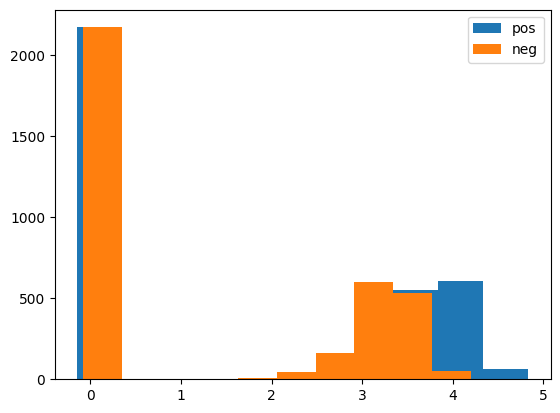

In [16]:
plt.hist(MergedData.loc[MergedData['label']].median(axis=0), label='pos')
plt.hist(MergedData.loc[~MergedData['label']].median(axis=0), label='neg')
plt.legend()
plt.show()

In [17]:
MergedData = MergedData.dropna(axis='index')
Data = MergedData.iloc[:, :-1]
y = MergedData.iloc[:, -1]
display(Data)
display(y)

,ACH-000001_x,ACH-000004_x,ACH-000005_x,ACH-000007_x,ACH-000009_x,ACH-000011_x,ACH-000012_x,ACH-000013_x,ACH-000014_x,ACH-000015_x,...,ACH-001578,ACH-000036,ACH-000973,ACH-001128,ACH-000750,ACH-000285,ACH-002669,ACH-001858,ACH-001997,ACH-000052
A1BG,0.094568,0.012676,0.053957,0.026704,0.059383,0.009210,0.132594,0.062889,0.035633,0.158699,...,2.134221,2.560715,4.986411,4.303781,0.000000,4.868390,0.014355,0.176323,0.000000,4.867402
A1BG,0.094568,0.012676,0.053957,0.026704,0.059383,0.009210,0.132594,0.062889,0.035633,0.158699,...,2.134221,2.560715,4.986411,4.303781,0.000000,4.868390,0.014355,0.176323,0.000000,4.867402
A1CF,0.012519,0.049011,0.027968,0.083588,0.051826,0.026635,0.023306,0.083143,0.066640,0.022402,...,0.000000,0.097611,0.000000,0.000000,0.028569,0.014355,1.035624,0.056584,0.000000,0.000000
A2ML1,0.025962,0.033215,0.005448,0.011299,0.011721,0.003488,0.002901,0.009602,0.015126,0.017902,...,2.805292,0.000000,0.014355,0.000000,0.014355,0.042644,0.000000,0.014355,0.250962,3.187451
A4GNT,0.020199,0.005015,0.005457,0.032573,0.042128,0.031224,0.004329,0.047029,0.351851,0.007575,...,0.000000,0.014355,0.097611,0.000000,0.028569,0.014355,0.028569,0.056584,0.014355,0.189034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZW10,0.555867,0.007427,0.071035,0.213754,0.169463,0.163544,0.128432,0.947852,0.130615,0.174493,...,4.118526,2.247928,5.005400,4.213347,4.361768,4.418190,3.349082,4.179511,3.889474,4.536675
ZWINT,0.080585,0.230569,0.274568,0.615338,0.405712,0.535260,0.966785,0.010011,0.937716,0.120301,...,6.078524,5.747656,7.031991,6.802710,6.051155,7.784504,7.004951,5.780835,5.515069,7.090007
ZWINT,0.080585,0.230569,0.274568,0.615338,0.405712,0.535260,0.966785,0.010011,0.937716,0.120301,...,6.078524,5.747656,7.031991,6.802710,6.051155,7.784504,7.004951,5.780835,5.515069,7.090007
ZZZ3,0.324623,0.042530,0.050412,0.274833,0.269194,0.125139,0.306162,0.580409,0.077300,0.100964,...,4.926948,4.489928,4.135863,3.804260,4.325530,4.258519,3.765535,4.780310,4.276497,4.519793


A1BG     False
A1BG     False
A1CF     False
A2ML1    False
A4GNT    False
         ...  
ZW10     False
ZWINT    False
ZWINT    False
ZZZ3     False
ZZZ3     False
Name: label, Length: 6966, dtype: bool

In [22]:
#Export to CSV for use in other files
MergedData.to_csv('Data.csv')